<a href="https://colab.research.google.com/github/nyny137/cynthia/blob/main/Simple_Model_of_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Learning for better life/Economic_S4.csv'
df = pd.read_csv(path)

In [5]:
df.describe()

,Year,Inflation,Lending_Interest_Rate,Unemployment,GDP,NPL
count,18.000000,14.000000,14.000000,14.000000,18.000000,14.000000
mean,2014.500000,0.076006,0.105032,0.037729,0.056717,0.029686
std,5.338539,0.062763,0.033178,0.005974,0.015489,0.018673
min,2006.000000,0.006312,0.069694,0.030900,0.026300,0.005000
25%,2010.250000,0.035251,0.074558,0.032525,0.047750,0.019150
50%,2014.500000,0.066553,0.102217,0.036100,0.060950,0.023900
75%,2018.750000,0.089071,0.126468,0.043125,0.067775,0.036875
max,2023.000000,0.231154,0.169538,0.046500,0.081300,0.075000


In [6]:
df1 = df[['Inflation','Lending_Interest_Rate','Unemployment','GDP']]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


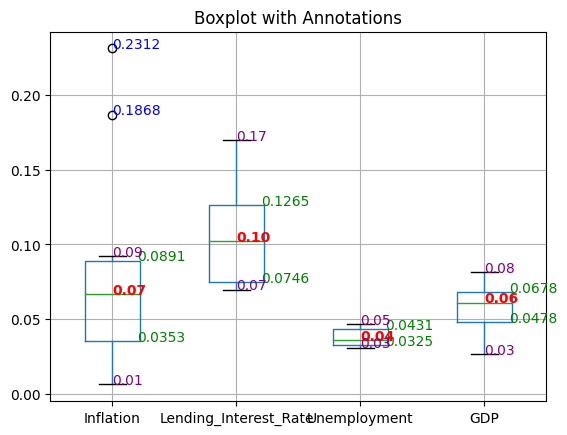

In [8]:
ax, bp = pd.DataFrame.boxplot(df1, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whisker.get_ydata() for whisker in bp["whiskers"]]

# Annotate the outliers on the plot
pad = 0.2
for i in range(4):
    for j in range(len(outliers[i])):  # Loop through each outlier
        ax.text(i + 1, outliers[i][j], "{:.4f}".format(outliers[i][j]), color='blue')

pad = 0.2
for i in range(len(boxes)):  # Loop through each box plot category
    ax.text(i + 1 + pad, boxes[i][1], "{:.4f}".format(boxes[i][1]), color='green')  # Lower quartile (25%)
    ax.text(i + 1 + pad, boxes[i][2], "{:.4f}".format(boxes[i][2]), color='green')  # Upper quartile (75%)

# Annotate the medians on the plot
for i in range(len(medians)):  # Loop through each box plot category
    ax.text(i + 1, medians[i][0], "{:.2f}".format(medians[i][0]), color='red', fontweight='bold')

# Annotate the whiskers (min and max values) on the plot
for i in range(len(whiskers) // 2):  # There are 2 whiskers per category, so loop in pairs
    ax.text(i + 1, whiskers[i * 2][1], "{:.2f}".format(whiskers[i * 2][1]), color='purple')  # Lower whisker
    ax.text(i + 1, whiskers[i * 2 + 1][1], "{:.2f}".format(whiskers[i * 2 + 1][1]), color='purple')  # Upper whisker

# Display the plot
plt.title("Boxplot with Annotations")
plt.show()

So base on this we can check data value to see if there are any significant outliner. Basically, instead of 2 variable of inflation that present outlner, the rest of data has normal distribution

In [9]:
df1.quantile([0.01,0.25,0.5,0.75,0.99])

,Inflation,Lending_Interest_Rate,Unemployment,GDP
0.01,0.008960,0.069822,0.030926,0.027354
0.25,0.035251,0.074558,0.032525,0.047750
0.50,0.066553,0.102217,0.036100,0.060950
0.75,0.089071,0.126468,0.043125,0.067775
0.99,0.225385,0.168017,0.046487,0.079889


# **Correlation check between independence variable**

In [10]:
df_corr = df[['Inflation', 'Lending_Interest_Rate', 'Unemployment', 'GDP','NPL']]
print("-----------pearson result---------------")
print(df_corr.corr(method='pearson', min_periods=1))
print("-----------kendall result---------------")
print(df_corr.corr(method='kendall'))
print("------------spearman result--------------")
print(df_corr.corr(method='spearman'))

-----------pearson result---------------
                       Inflation  Lending_Interest_Rate  Unemployment  \
Inflation               1.000000               0.925695      0.422299   
Lending_Interest_Rate   0.925695               1.000000      0.414612   
Unemployment            0.422299               0.414612      1.000000   
GDP                    -0.381281              -0.428401     -0.218992   
NPL                     0.418171               0.442572      0.293610   

                            GDP       NPL  
Inflation             -0.381281  0.418171  
Lending_Interest_Rate -0.428401  0.442572  
Unemployment          -0.218992  0.293610  
GDP                    1.000000 -0.984688  
NPL                   -0.984688  1.000000  
-----------kendall result---------------
                       Inflation  Lending_Interest_Rate  Unemployment  \
Inflation               1.000000               0.846154      0.419896   
Lending_Interest_Rate   0.846154               1.000000      0.353597

Based on the result, we can see that:
-  Both Inflation and Lending Interest Rate are strongly positively correlated across all methods.
=> **therefore when using these 2 variable to build model we need to consider the multicolinear effect which impact to dependent Y but not show the related of X to Y**
-  Inflation and Unemployment show moderate positive correlations, with Spearman slightly indicating a stronger association.
- Inflation and GDP have weak negative correlations in all methods.
- GDP and NPL have very strong inverse relationships, showing that as GDP increases, non-performing loans decrease sharply, consistent across all methods.
=> Choose GDP for model due to it has highest corr effect

# **Model Build**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
x_train = df[['GDP']][:14]
y_train = df['NPL'][:14].values.reshape(-1, 1)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Predict NPL in the next for year

In [22]:
X_Test = df['GDP'][-4:].values.reshape(-1, 1)
Y_Pred = model.predict(X_Test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print('GDP predict in the next 4 year: \n', X_Test)

GDP predict in the next 4 year: 
 [[0.0263]
 [0.0336]
 [0.0396]
 [0.0586]]


In [24]:
print('Predict NPL base on GDP: \n', Y_Pred)


Predict NPL base on GDP: 
 [[0.08225604]
 [0.07139335]
 [0.06246511]
 [0.03419235]]


In [25]:
import statsmodels.api as sm

In [26]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train , alpha=0.05).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     382.9
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.80e-10
Time:                        18:58:01   Log-Likelihood:                 60.839
No. Observations:                  14   AIC:                            -117.7
Df Residuals:                      12   BIC:                            -116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1214      0.005     25.431      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


R-square in this model obtain 0.97 which mean it has statistic meaning